In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (9, 7)
# we use regex here to parse the output log files
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read the result from normal experiment first
normal_acc_list = []
normal_steps = []
with open("normal_experiment", 'rb') as normal_file:
    step_counter_ = 0
    for line in normal_file.readlines():
        line_string = line.rstrip('\n')
        search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
        if search_sth:
            acc = search_sth.group(2)
            step_counter_ += 200
            normal_acc_list.append(acc)
            normal_steps.append(step_counter_)
# handle output files of simulated byzantine error then
reverse_scale = [1, 10, 100]
error_accs = []
error_steps = []
error_prefix = "reverse_gradient_"
for s in reverse_scale:
    with open(error_prefix + str(s), 'rb') as r_file:
        step_counter_ = 0
        tmp_acc_list = []
        tmp_steps_list = []
        for line in r_file.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                acc = search_sth.group(2)
                step_counter_ += 200
                tmp_acc_list.append(acc)
                tmp_steps_list.append(step_counter_)
    error_accs.append(tmp_acc_list)
    error_steps.append(tmp_steps_list)

# parsing geometric median results then
geo_reverse_scale = [10, 100, 200]
geo_prefix = 'geo_reverse_gradient_'
geo_accs = []
geo_steps = []
for s in geo_reverse_scale:
    with open(geo_prefix + str(s), 'rb') as g_file:
        step_counter_ = 0
        tmp_acc_list = []
        tmp_steps_list = []
        for line in g_file.readlines():
            line_string = line.rstrip('\n')
            search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
            if search_sth:
                acc = search_sth.group(2)
                step_counter_ += 200
                tmp_acc_list.append(acc)
                tmp_steps_list.append(step_counter_)
    geo_accs.append(tmp_acc_list)
    geo_steps.append(tmp_steps_list)

# parse fail 3 out of 7 workers:
ths_acc_list = []
ths_steps = []
with open("fail3_out_of7", 'rb') as ths_file:
    step_counter_ = 0
    for line in ths_file.readlines():
        line_string = line.rstrip('\n')
        search_sth = re.match('Test set: Average loss: (.*), Prec@1: (.*) Prec@5: (.*)', line_string)
        if search_sth:
            acc = search_sth.group(2)
            step_counter_ += 200
            ths_acc_list.append(acc)
            ths_steps.append(step_counter_)

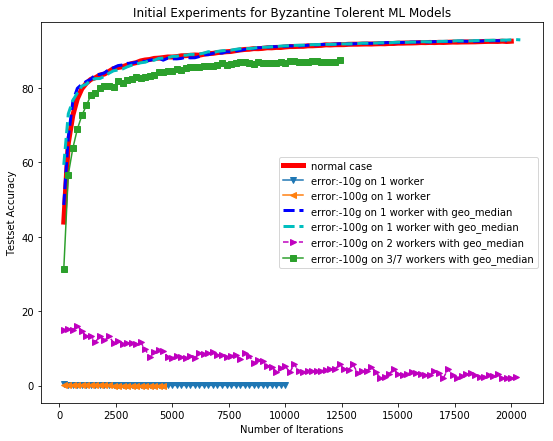

In [5]:
fig = plt.figure()
plt.plot(normal_steps, normal_acc_list, '-r',linewidth=5.0, label="normal case")
plt.plot(error_steps[1], error_accs[1], '-v', label="error:-10g on 1 worker")
plt.plot(error_steps[2], error_accs[2], '-<', label="error:-100g on 1 worker")
plt.plot(geo_steps[0], geo_accs[0], '--b', linewidth=3.0, label="error:-10g on 1 worker with geo_median")
plt.plot(geo_steps[1], geo_accs[1], '--c', linewidth=3.0,label="error:-100g on 1 worker with geo_median")
plt.plot(geo_steps[2], geo_accs[2], '-->m', label="error:-100g on 2 workers with geo_median")
plt.plot(ths_steps, ths_acc_list, '-s', label="error:-100g on 3/7 workers with geo_median")
plt.xlabel("Number of Iterations")
plt.ylabel("Testset Accuracy")
plt.title("Initial Experiments for Byzantine Tolerent ML Models")
plt.legend()
plt.show()